In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Bu veri kümesi, tarihli finansal veriler içeriyor ve çeşitli ekonomik göstergeleri temsil eden sütunlardan oluşuyor. Sütunlar şu şekilde:

1. **Date**: Bu sütun, her satır için belirli bir tarihe işaret ediyor. Veriler 2008 yılına ait ve genellikle günlük verilerdir.
   
2. **SPX (S&P 500 Endeksi)**: Bu sütun, S&P 500 endeksinin kapanış değerlerini gösteriyor. S&P 500, Amerika'daki en büyük 500 şirketin performansını izleyen bir borsa endeksidir. Bu değer, hisse senetlerinin genel piyasa hareketlerini anlamaya yardımcı olur.

3. **GLD (Altın Fiyatı)**: GLD, altının Amerikan doları cinsinden fiyatını temsil ediyor. Bu veri, altın fiyatlarının zaman içindeki değişimini takip etmeyi sağlar. Altın genellikle ekonomik belirsizlik zamanlarında değer kazanır.

4. **USO (Petrol Fiyatı)**: USO, petrol fiyatlarını temsil ediyor. Petrol, dünya ekonomisinde önemli bir rol oynar ve genellikle ekonomik büyüme, enerji talebi ve jeopolitik olaylarla ilişkilendirilir.

5. **SLV (Gümüş Fiyatı)**: SLV, gümüşün fiyatını gösterir. Gümüş de altın gibi değerli bir metal olup, genellikle ekonomik dalgalanmalara karşı bir güvenli liman olarak görülür.

6. **EUR/USD**: Bu sütun, Euro ile Amerikan Doları arasındaki döviz kuru oranını gösteriyor. Yani, 1 Euro'nun kaç Amerikan Doları'na denk geldiğini ifade eder. Bu veri, döviz piyasalarındaki değişimleri anlamanızı sağlar.

### Verilerin Analizi:
Veri, 2008 yılı başlarından itibaren günlük veriler içeriyor ve finansal piyasalarda yaşanan fiyat değişimlerini izliyor. Bu tür veriler, yatırımcılar için piyasa eğilimlerini analiz etmek, fiyatların birbirleriyle olan ilişkilerini incelemek ve risk yönetimi stratejileri geliştirmek için çok faydalıdır.

Örneğin:
- **SPX** (S&P 500 endeksi) ile **GLD** (altın fiyatı) arasındaki ilişkiyi inceleyerek, genellikle ekonomik belirsizlik zamanlarında altının değer kazandığını görebilirsiniz. Bu, altının "güvenli liman" olarak görülmesinin bir sonucu olabilir.
- **USO** (petrol fiyatları) ile **EUR/USD** (döviz kuru) arasında da ilişkiler olabilir, çünkü petrol fiyatlarındaki artışlar genellikle enerji maliyetlerini etkiler ve dolayısıyla döviz piyasalarında da dalgalanmalara yol açabilir.

### Öneriler:
- Bu veriyi daha ileri düzeyde analiz etmek için **zaman serisi analizleri** yapabilirsiniz, örneğin:
  - **Korelasyon analizi**: Hangi varlıkların birbirleriyle yüksek veya düşük korelasyona sahip olduğunu görmek.
  - **Regresyon analizi**: Belirli bir varlık (örneğin, altın fiyatı) ile diğer varlıklar arasındaki ilişkiyi daha ayrıntılı incelemek.
  - **Volatilite analizi**: Hangi varlıkların daha volatil olduğunu belirlemek.

Veri, ekonomik olayların nasıl birbirini etkilediğini anlamanızı sağlayacak değerli bilgiler sunabilir.

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Bu özet istatistikler, finansal varlıkların günlük fiyat hareketlerini gösteriyor. 

- **SPX (S&P 500)**: Ortalama 1654,11, yüksek volatilite (519.11 standart sapma) ile büyük fiyat dalgalanmaları var. En düşük 676,53, en yüksek 2872,87.
- **GLD (Altın)**: Ortalama 122,73, volatilite 23,28. En düşük 70, en yüksek 184,59.
- **USO (Petrol)**: Ortalama 31,84, volatilite 19,52. En düşük 7,96, en yüksek 117,48.
- **SLV (Gümüş)**: Ortalama 20,08, volatilite 7,09. En düşük 8,85, en yüksek 47,26.
- **EUR/USD**: Ortalama 1,28, volatilite 0,13. En düşük 1,04, en yüksek 1,60.

Sonuç: Altın ve petrol gibi değerli metaller genellikle volatil, S&P 500 endeksi ise büyük fiyat değişimleri gösteriyor.

Veri, farklı varlıkların fiyat hareketlerinin ortalama değerini, volatilitesini ve en düşük/en yüksek fiyatlarını gösteriyor. 

- **S&P 500** (SPX) ve **Petrol** (USO) gibi varlıklar yüksek volatiliteye sahip, yani büyük fiyat dalgalanmaları yaşıyorlar.
- **Altın** (GLD) da volatil, ancak daha düşük bir volatiliteye sahip.
- **Gümüş** (SLV) nispeten daha düşük volatiliteye sahip.
- **Euro/Dolar** (EUR/USD) en düşük volatiliteye sahip, dolayısıyla daha stabil.

Özetle, **S&P 500**, **petrol** ve **altın** daha riskli varlıklarken, **Euro/Dolar** daha stabil bir yatırım

**Volatilite**, bir varlığın fiyatlarının belirli bir dönemde ne kadar değişken olduğunu, yani dalgalandığını ifade eder. Yüksek volatilite, fiyatların büyük ölçüde ve sık değiştiğini, düşük volatilite ise fiyatların daha stabil olduğunu gösterir.

- **Yüksek volatilite**: Fiyatlar hızlı ve büyük dalgalanmalara sahiptir. Bu durum, yatırımcılar için daha fazla risk anlamına gelir, çünkü fiyatlar daha tahmin edilemez olabilir.
- **Düşük volatilite**: Fiyatlar daha az değişir, daha stabil bir seyir izler. Bu durum, daha az riskli ve daha öngörülebilir bir yatırım ortamı yaratır.

Örneğin, **S&P 500** ve **petrol fiyatları** gibi varlıklar genellikle yüksek volatiliteye sahiptir, yani değerlerinde büyük dalgalanmalar olab

ilir. aracı.

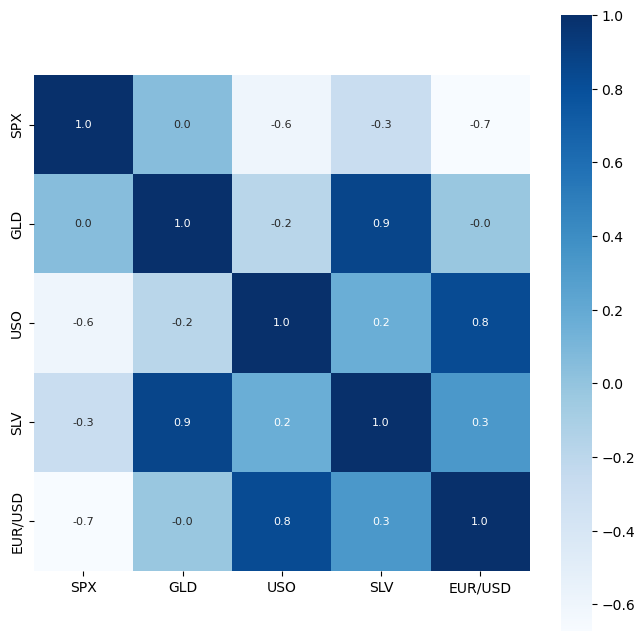

In [12]:
# Select only numeric columns from the DataFrame
gold_data_numeric = gold_data.select_dtypes(include=['float64', 'int64'])

# Now calculate the correlation matrix
correlation = gold_data_numeric.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\asli_\AppData\Local\Temp\ipykernel_17304\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

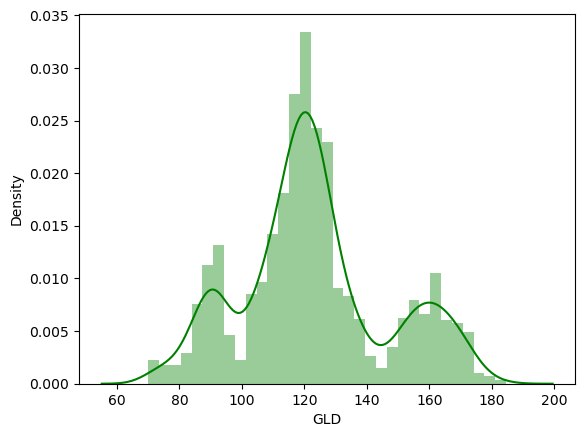

In [16]:
sns.distplot(gold_data['GLD'],color='green')

Grafikte, **GLD** (altın) değerlerinin çoğunlukla 120 civarında yoğunlaştığı ve bu değerin veri setindeki "tipik" değer olduğunu gösteriyor. Dağılım sağa kaymış, yani altın fiyatları genellikle 120 civarında seyrederken, zaman zaman **yüksek fiyat dalgalanmaları** yaşanabiliyor. Bu, altın fiyatlarının çoğunlukla dar bir aralıkta işlem gördüğünü, ancak bazı dönemlerde **daha geniş fiyat hareketlerinin** yaşanabileceğini ve bunun da genellikle düşük sıklıkta olduğunu işaret ediyor. Dağılımın normal dağılıma yakın olması, fiyatların genellikle belirli bir merkez etrafında toplandığını ancak kriz veya belirsizlik dönemlerinde **yüksek volatilitenin** yaşanabileceğini gösteriyor. Yatırımcılar için, altın fiyatlarının genellikle istikrarlı bir seviyede bulunduğu, ancak dışsal faktörlerin etkisiyle aniden büyük fiyat değişiklikleri yaşanabileceği bir durum söz konusu.

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
# Veriyi eğitim ve test setlerine ayırıyoruz (%80 eğitim, %20 test verisi)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Random Forest Regressor modelini oluşturuyoruz, 100 ağaç kullanarak
regressor = RandomForestRegressor(n_estimators=100)

# Modeli eğitim verisi ile eğitiyoruz
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**RandomForestRegressor**, birçok karar ağacının birleşimiyle çalışan bir modeldir. Bu model, her bir ağacı farklı bir şekilde eğiterek daha doğru ve güvenilir tahminler yapar. Çünkü tek bir ağacın yaptığı hataları diğer ağaçlar düzeltir. Bu sayede model, veriye fazla uyum sağlama (overfitting) sorununu azaltır ve karmaşık ilişkileri daha iyi öğrenir. Ayrıca, eksik verilerle bile iyi çalışır ve verinin özelliklerinin hangi kısmının daha önemli olduğunu belirleyebilir. Bu özellikler, **RandomForestRegressor**'ı doğru ve güvenilir tahminler yapabilen bir model yapar.

**RandomForestRegressor**, genellikle şu durumlarda tercih edilir:

1. **Karmaşık ve Doğrusal Olmayan İlişkilerr.

2. **Aşırı Uydurma (Overfitting) Risnar.

3. **Eksik Verilerle Çaliptir.

4. **Özelliklerin Önemini Anlamak**: Hangi özelliklerin hedef değişken üzerinde daha fazla etkisi olduğunu anlamak isteniyorsa, Random Forest bu bilgiyi sağlar.

5. **Veri Ön İşleme Gereksinimi Düşük Olan Durumlar**: Verilerin ölçeklendirilmesi veya normalleştirilmesi gibi ön işleme işlemleri gerektirmez, bu da onu hızlı ve esnek bir seçenek yapar.

Bu sebeplerle, karmaşık veri setlerinde, eksik veri durumlarında veya doğrusal olmayan ilişkilerde genellikle tercih edilir.

In [20]:
# Test verisi üzerinde tahmin yapıyoruz
test_data_prediction = regressor.predict(X_test)

# Tahmin edilen değerleri yazdırıyoruz
print(test_data_prediction)

[168.56709907  81.64970003 115.85160034 127.67000088 120.81050138
 154.84139811 150.10709821 126.10500067 117.48489868 125.89570112
 116.60080142 171.70010084 140.93749868 167.82639846 115.20250028
 117.68580041 140.28880281 169.78810096 159.5525028  160.99639914
 155.12900032 124.99590032 176.46869942 156.73340319 125.15390049
  93.81379954  77.68029995 120.80780017 119.1558993  167.47839996
  88.2876005  125.32240062  91.17720088 117.66270039 121.20079898
 136.78800085 115.85210072 115.34040069 147.3855002  107.199301
 104.4765025   87.15069768 126.43100054 117.95399982 153.51139912
 119.56289996 108.46599955 108.14999812  93.28630051 127.26329751
  75.08120026 113.49849894 121.08210016 111.26529906 118.8797991
 120.43209939 158.53269967 167.27860105 146.87849669  85.90739853
  94.42270049  86.75279877  90.60520062 119.10700044 126.47470071
 127.59720021 169.6773997  122.19059925 117.5278988   98.30860058
 168.24000066 142.85159766 132.01910184 121.272202   121.16499971
 119.73910069

In [21]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893044980963515


Bu sonuç, modelinizin test verisi üzerinde **çok iyi bir tahmin gücüne sahip olduğunu** ve veri içindeki varyansın **%98.93**'ünü başarıyla açıkladığını gösteriyor. Modeliniz oldukça güvenilir ve doğru sonuçlar üretiyor.

In [22]:
Y_test = list(Y_test)

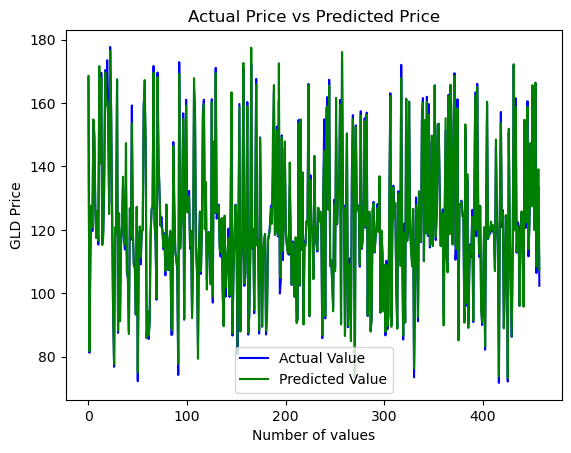

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Grafikte, gerçek (mavi) ve tahmin edilen (yeşil) GLD fiyatları karşılaştırılmaktadır. Genel olarak, tahmin edilen fiyatlar (yeşil çizgi) gerçek fiyatları (mavi çizgi) takip etmekte, ancak her noktada tam olarak örtüşmemektedir. Bu durum, modelin genel eğilimleri doğru tahmin ettiğini ancak özellikle volatilite yüksek dönemlerde fiyatları tam olarak kestirmekte zorlandığını göstermektedir. Altın gibi karmaşık ve değişken fiyatlara sahip bir varlık için bu tür sapmalar normaldir, ancak modelin daha iyi sonuçlar verebilmesi için bazı iyileştirmelere ihtiyaç duyulabilir.